# Customer Churn Prediction

## Problem statement

-  In business, churn is defined as a measure when customers leave company or purchase process during a given period. Churn prediction, is the process of using machine learning algorithms to identify which customers are likely to churn in the future. This is important for companies because it is usually more expensive to acquire new customers than to retain existing ones. It can help companies focus on retaining customers who are at risk of leaving the company. The E-commerce project is conducted to respond to the statement “Which customers are likely to churn during the purchase process?” using Machine Learning.

### Data Definition
- Session Count (Each time an user initiates a session, a session counter increments for that user)
- Event Count (Number of times the event was triggered)
- Closed Session Event Count (Number of times the session was closed )
- Open Session Event Count (Number of times the customer logged into the system)
- Quest Completed Event Count ( Whatever the user was searching they found )
- Store Purchase Event Count ( Number of times the item was purchased)
- Active Days( Number of days the session was active )
- Session Length Minutes ( Session length is typically defined as the amount of time the app is in front of the user )

## Insights

- The active days of customers range from 1 to 60 days. Around 38 % customers churn having low active days. As the active days increase the retention rate increases significantly.
- Around 65% customers have session lengths (min) of 0 to 390 minutes, out of which around 42 % churned, while only 23% stays. As the session length tends to increase, although the number of customers decreases, retention rate increases.
- Around 75% of customers have either 0,1 or 2 store purchase event count, with around 43 % churn rate and 32 % stay rate. As the store purchase event count increase the churn rate drops to just 3 %.
- Customers with lower session count tend to churn more, compared to customers with higher season count.
- Event count with highest number of customer is in bracket  0 to 600, out of which 45 % churn, while only 25 % stay. Also as the event count increases the stay rate increase significantly. 
- The interpretation of open session event count and closed session event count is same. Around 65 % with lowest (0 to 60) closed and open session event count have highest churn rate. As the open and close session count increase the number of customers reduces significantly. There are few customers with very high values, out of which 16 % stay and only 2 % churn.

## Modeling

- Decision Tree, Random Forest, Logistics Regression, and Linear Regression are preferred tools for this problem. Model performance will be conducted using Accuracy, Sensitivity, Specificity, Precision and F1-score.
- For the purpose of this problem, the model is expected to identify as many customers who are likely to Churn as possible. Hence, Sensitivity which measures the ratio between how much are correctly identified as churn to how much are actually churn, is set to be the main measure.

## Model Performance

- The Logistics Regression model yields the relatively good result across Accuracy, Sensitivity, and Specificity in both train and test data. This is the best model for predicting churn with sensitivity for train and test data being 97 % and 96 % respectively. Also logistic regression has a good accuracy score of 68 % for train data and 67 % for test data.


- Logistic Regression will be the chosen model for implementation as it yields the highest Sensitivity and great insights into feature significance.


## Recommendations

Based on the outcomes produced by the Logistic Regression model, the management team is recommended to consider a number of approaches to manage customers with high likelihood of churn, which include:
- Incentives that encourage customers to stay for longer times on the applications so the churn rate could reduce. The company may consider incentives for those who used the application for a certain number of time. This can be applied to campaigns that encourage customers to get to know the benefits of the app. For example, 5% discount of total premium if a customer used the app daily for a week. The revenue forgone in form of discount should outweigh the cost of churn to ensure the feasibility of the initiative.
- Attractive offers for new customers, and those in the high churn propensity list.
- If the company's strategy favors customer retention, stricter risk analysis and management should be in place. 
- The customer persona also helps to identify customers with high chance of churn when they use the application. The company may monitor their online activity closely and identify the probable causes new customers close the application.
- The company could work to provide more features, better UI and user experience to its customers.


#### Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_excel('Ecom Data.xlsx')

In [3]:
df.head()

,churn_status,session_length_seconds,session_count,event_count,closed_session_event_count,open_session_event_count,quest_completed_event_count,store_purchase_event_count,active_days
0,Stayed,18355,43,313,55,55,48,0,31
1,Stayed,16468,24,235,55,54,47,0,13
2,Churned,46231,101,742,217,217,51,2,12
3,Stayed,168537,212,2763,272,267,1391,6,53
4,Churned,12885,37,257,54,53,22,0,16


In [4]:
## We will keep an untouched copy of our dataset in case we need it ahead.

dt = df.copy()

In [5]:
# Checking descriptive statistics of Numeric variables

pd.options.display.float_format = '{:.5f}'.format
df.describe()

,session_length_seconds,session_count,event_count,closed_session_event_count,open_session_event_count,quest_completed_event_count,store_purchase_event_count,active_days
count,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000
mean,35716.74840,64.17580,721.42070,109.08670,108.42480,202.25160,4.67630,15.23430
std,75896.32471,102.12265,1443.55643,189.63287,189.11090,737.30737,17.47490,16.42441
min,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000
25%,1449.00000,3.00000,41.00000,6.00000,6.00000,3.00000,0.00000,2.00000
50%,8063.50000,17.00000,197.00000,28.00000,28.00000,20.00000,0.00000,8.00000
75%,36023.50000,79.00000,789.00000,128.00000,127.00000,103.00000,3.00000,24.00000
max,1628535.00000,828.00000,25869.00000,2671.00000,2664.00000,17538.00000,401.00000,55.00000


In [6]:
pd.options.display.float_format = '{:.5f}'.format

In [7]:
# Checking descriptive statistics of Categorical variables

df.describe(include = 'object')

,churn_status
count,10000
unique,2
top,Stayed
freq,5227


In [8]:
df['churn_status'].value_counts()

Stayed     5227
Churned    4773
Name: churn_status, dtype: int64

In [9]:
#converting session length from seconds to minutes

df['session_length_min'] = df['session_length_seconds']/60

### Checking NA values in dataset

In [10]:
df.isna().sum()

## No NA values in dataset

churn_status                   0
session_length_seconds         0
session_count                  0
event_count                    0
closed_session_event_count     0
open_session_event_count       0
quest_completed_event_count    0
store_purchase_event_count     0
active_days                    0
session_length_min             0
dtype: int64

# Outliers Treatment

<AxesSubplot:>

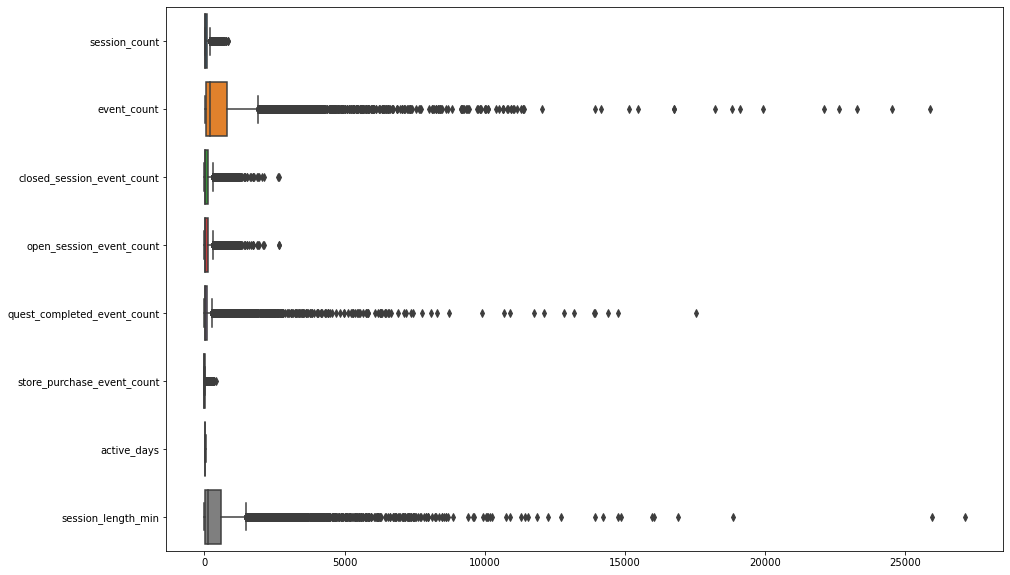

In [11]:
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize']=(15,10)
sns.boxplot(data=df.drop(df.columns[[0,1]], axis=1), orient="h")

#### There’s a quite a lot of features with outliers. We will use a quantile based flooring method to treat outliers. As per the method, any value beyond 1.5*Q1 and 1.5*Q3 will be regarded as outliers,  and all the outlier values will be replaced by Q1-1.5*Q1 and Q3+1.5*Q3.

#### Count number of outliers


In [12]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

active_days                       0
churn_status                      0
closed_session_event_count     1071
event_count                    1059
open_session_event_count       1078
quest_completed_event_count    1457
session_count                  1067
session_length_min             1150
session_length_seconds         1150
store_purchase_event_count     1357
dtype: int64

In [13]:
cat = list(df.select_dtypes(include='object').columns) #object type columns
num = list(df.select_dtypes(exclude='object').columns) #numerical type columns
num.remove('session_length_seconds')
cat.remove('churn_status')

# Seperating Outliers and Checking Customer Profile

### Session_count

In [14]:
## Seperating Outliers ids for Session_count in seperate dataframe.

Q1 = df['session_count'].quantile(0.25)
Q3 = df['session_count'].quantile(0.75)
IQR=Q3-Q1
lr= Q1-(1.5 * IQR)
ur= Q3+(1.5 * IQR)

session_count = df.loc[ (df['session_count']<  (Q1 - 1.5 * IQR)) | (df['session_count'] > (Q3 + 1.5 * IQR))   , ]
session_count.head()

,churn_status,session_length_seconds,session_count,event_count,closed_session_event_count,open_session_event_count,quest_completed_event_count,store_purchase_event_count,active_days,session_length_min
3,Stayed,168537,212,2763,272,267,1391,6,53,2808.95000
16,Stayed,193454,199,3603,482,477,1148,21,43,3224.23333
24,Stayed,248000,601,5771,948,935,2314,21,55,4133.33333
35,Churned,136202,316,3546,560,557,1437,23,44,2270.03333
47,Stayed,103963,219,2120,357,356,578,15,29,1732.71667


In [15]:
## Checking proportion of churn and stayed for these outliers

(session_count.value_counts('churn_status')/ len(session_count))*100

churn_status
Stayed    94.65792
Churned    5.34208
dtype: float64

In [16]:
session_count.groupby(['churn_status']).std()

,session_length_seconds,session_count,event_count,closed_session_event_count,open_session_event_count,quest_completed_event_count,store_purchase_event_count,active_days,session_length_min
churn_status,,,,,,,,,
Churned,86260.44175,63.48334,1578.69863,180.01644,179.65622,1008.32932,12.05176,7.78892,1437.67403
Stayed,152416.91932,107.98046,2845.40706,284.12544,283.84637,1879.30486,39.34502,9.20281,2540.28199


#### As the standard deviation of the ID who have session count as outlier, is not close to 0. So, they have different characteristic. Hence the outliers for session count could be removed using IQR method.

## Event_count

In [17]:
## Seperating Outliers ids for event_count in seperate dataframe.

Q1 = df['event_count'].quantile(0.25)
Q3 = df['event_count'].quantile(0.75)
IQR=Q3-Q1
lr= Q1-(1.5 * IQR)
ur= Q3+(1.5 * IQR)
event_count = df.loc[ (df['event_count']<  (Q1 - 1.5 * IQR)) | (df['event_count'] > (Q3 + 1.5 * IQR))   , ]
event_count.shape

(1059, 10)

In [18]:
## Checking proportion of churn and stayed for these outliers

(event_count.value_counts('churn_status')/ len(event_count))*100

churn_status
Stayed    93.48442
Churned    6.51558
dtype: float64

In [19]:
event_count.groupby(['churn_status']).std()

,session_length_seconds,session_count,event_count,closed_session_event_count,open_session_event_count,quest_completed_event_count,store_purchase_event_count,active_days,session_length_min
churn_status,,,,,,,,,
Churned,91322.15345,93.53490,1619.80045,195.44545,195.43305,1220.54527,58.10743,9.61239,1522.03589
Stayed,145387.40303,133.80381,2739.36098,295.21659,295.16748,1877.65950,41.81225,12.93145,2423.12338


#### As the standard deviation of the customers who have event count as outlier, is not close to 0. So, they have different characteristic. Hence the outliers for event count could be removed using IQR method.

## closed_session_event_count

In [20]:
## Seperating Outliers ids for closed session event count in seperate dataframe.

Q1 = df['closed_session_event_count'].quantile(0.25)
Q3 = df['closed_session_event_count'].quantile(0.75)
IQR=Q3-Q1
lr= Q1-(1.5 * IQR)
ur= Q3+(1.5 * IQR)
closed_session_event_count = df.loc[ (df['closed_session_event_count']<  (Q1 - 1.5 * IQR)) | (df['closed_session_event_count'] > (Q3 + 1.5 * IQR))   , ]
closed_session_event_count.shape


(1071, 10)

In [21]:
## Checking proportion of churn and stayed for these outliers

(closed_session_event_count.value_counts('churn_status')/ len(closed_session_event_count))*100

churn_status
Stayed    94.02428
Churned    5.97572
dtype: float64

In [22]:
closed_session_event_count.groupby(['churn_status']).std()

,session_length_seconds,session_count,event_count,closed_session_event_count,open_session_event_count,quest_completed_event_count,store_purchase_event_count,active_days,session_length_min
churn_status,,,,,,,,,
Churned,92982.93486,79.88362,1805.78354,167.45666,166.46397,1299.99008,12.92706,8.72235,1549.71558
Stayed,148454.54602,119.25215,2806.27475,272.58888,272.47355,1890.65822,38.54275,11.63461,2474.24243


#### As the standard deviation of the customers who have closed session event count as outlier, is not close to 0. So, they have different characteristic. Hence the outliers for closed session event coun could be removed using IQR method.

# Outliers Capping

In [23]:
for cols in num:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    df[cols] = df[cols].mask(df[cols]<lr, lr, )
    df[cols] = df[cols].mask(df[cols]>ur, ur, )

<AxesSubplot:>

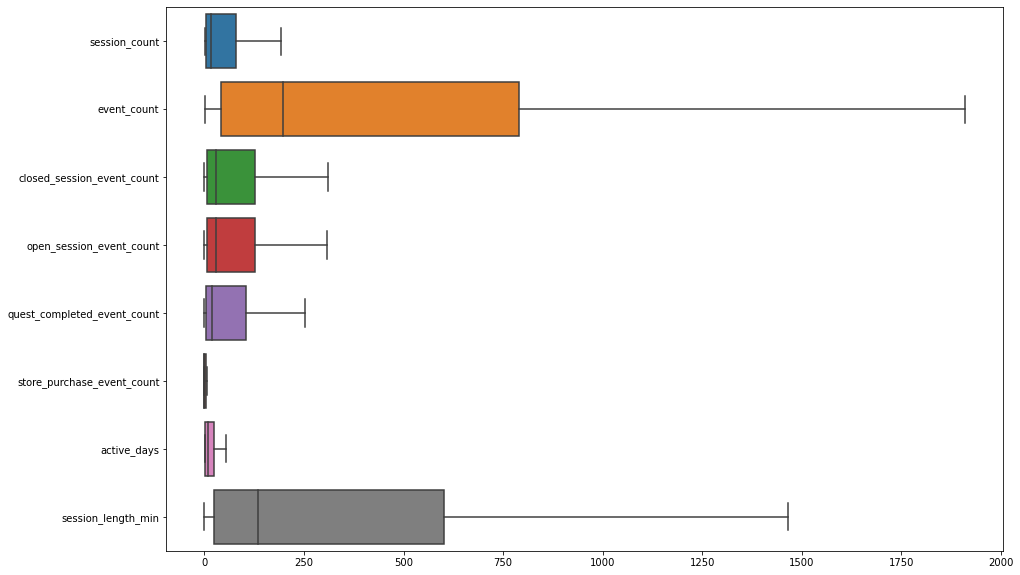

In [24]:
plt.rcParams['figure.figsize']=(15,10)
sns.boxplot(data=df.drop(df.columns[[0,1]], axis=1), orient="h")

# Now our data is free from outliers.

# Dummy Encoding

In [25]:
pd.get_dummies(df['churn_status'])

,Churned,Stayed
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
9995,0,1
9996,1,0
9997,1,0
9998,1,0


In [26]:
df = pd.concat([df,pd.get_dummies(df['churn_status'])] , axis = 1)

In [27]:
df.drop(['churn_status','session_length_seconds','Stayed'], axis=1, inplace = True)

## Descriptive analysis insights

### Session Count

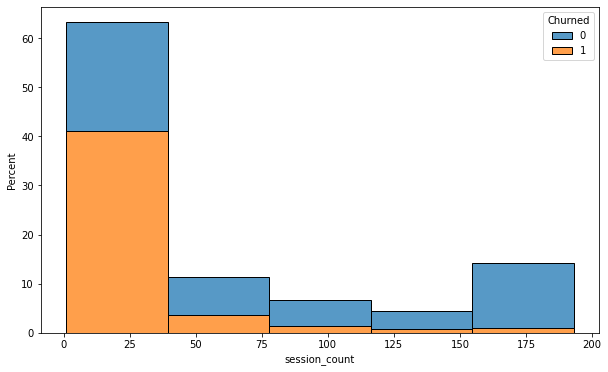

In [28]:
plt.rcParams['figure.figsize']=(10,6)
sns.histplot(data=df, x="session_count", hue="Churned", multiple = "stack", bins = 5, stat='percent')
plt.show()

### Event Count

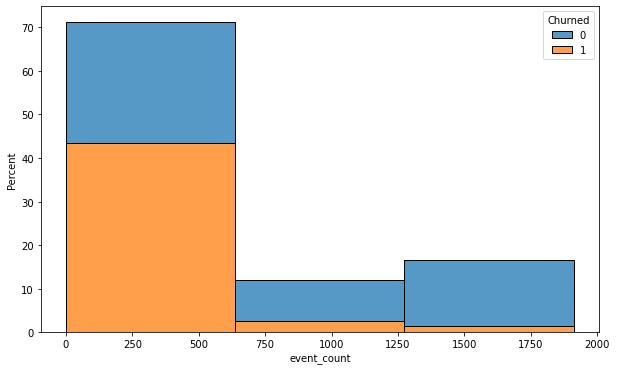

In [29]:
sns.histplot(data=df, x="event_count", hue="Churned", multiple = "stack", bins = 3, stat='percent')
plt.show()

### Closed Session Event Count

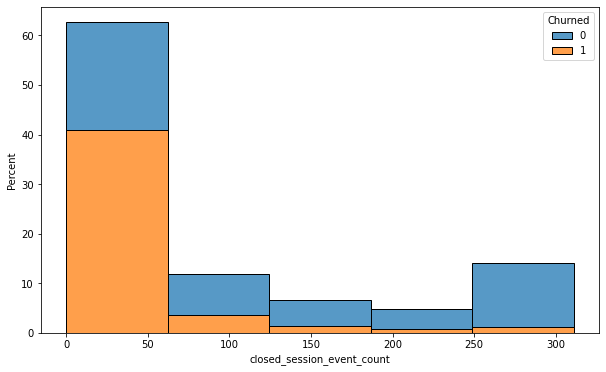

In [30]:
sns.histplot(data=df, x="closed_session_event_count", hue="Churned", multiple = "stack", bins = 5, stat='percent')
plt.show()

### Open Session Event Count

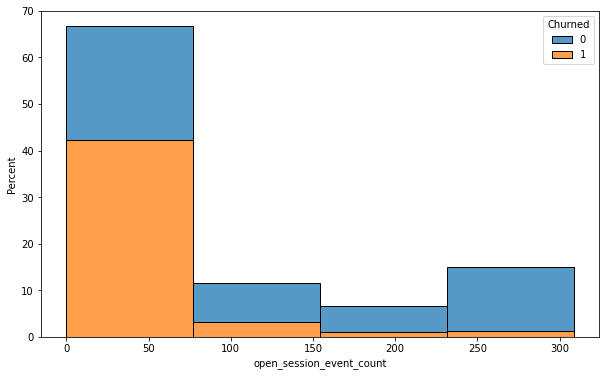

In [31]:
sns.histplot(data=df, x="open_session_event_count", hue="Churned", multiple = "stack", bins = 4, stat='percent')
plt.show()

### Quest Completed Event Count

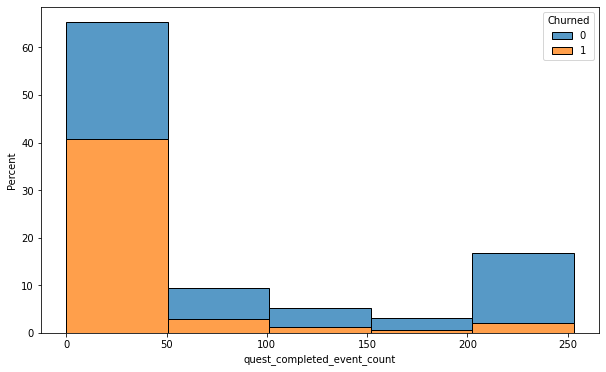

In [32]:
sns.histplot(data=df, x="quest_completed_event_count", hue="Churned", multiple = "stack", bins = 5, stat='percent')
plt.show()

### Store Purchase Event Count

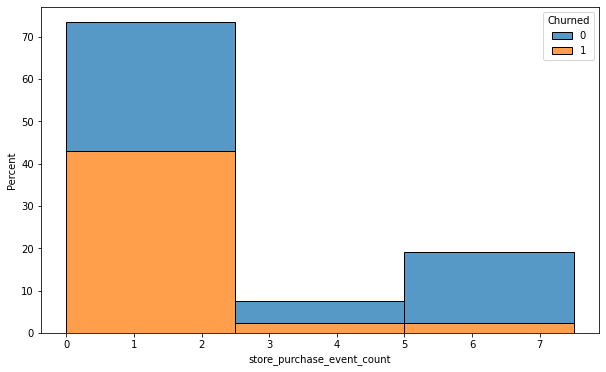

In [33]:
sns.histplot(data=df, x="store_purchase_event_count", hue="Churned", multiple = "stack", bins = 3, stat='percent')
plt.show()

### Active Days

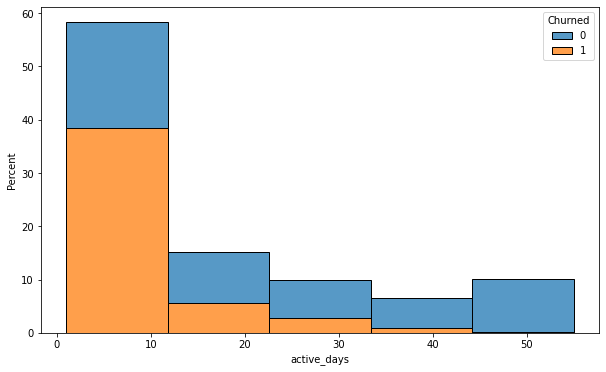

In [34]:
sns.histplot(data=df, x="active_days", hue="Churned", multiple = "stack", bins = 5, stat='percent')
plt.show()

### Session length min

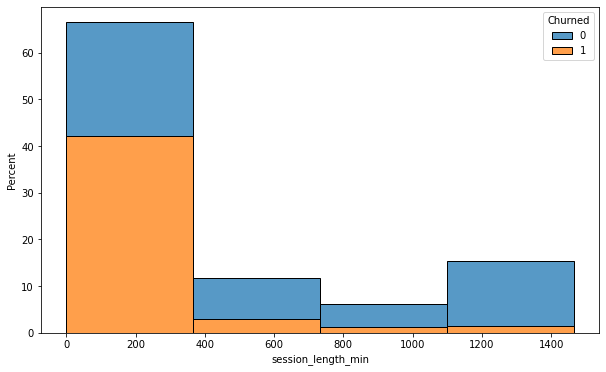

In [35]:
sns.histplot(data=df, x="session_length_min", hue="Churned", multiple = "stack", bins = 4, stat='percent')
plt.show()

In [36]:
df_num = df.drop(['Churned'],axis=1)
Churned = df['Churned']

# Normalization

In [37]:
df_num_norm = stats.zscore(df_num)

In [38]:
df_norm = pd.concat([Churned,df_num_norm] , axis = 1)

In [39]:
df_norm.head()

,Churned,session_count,event_count,closed_session_event_count,open_session_event_count,quest_completed_event_count,store_purchase_event_count,active_days,session_length_min
0,0,-0.13047,-0.32098,-0.26982,-0.26474,-0.22727,-0.67254,0.95994,-0.17490
1,0,-0.41975,-0.44268,-0.26982,-0.27430,-0.23823,-0.67254,-0.13604,-0.23754
2,1,0.75261,0.34833,1.26792,1.28358,-0.19440,0.05946,-0.19693,0.75046
3,0,2.15336,2.17216,1.78999,1.76145,2.01868,1.52346,2.29948,2.13321
4,1,-0.22182,-0.40835,-0.27931,-0.28385,-0.51212,-0.67254,0.04662,-0.35648


In [40]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf


# MultiCollinearity

# VIF

In [41]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
def compute_vif(considered_features):   
    v = df_norm[considered_features]
    v['intercept'] = 1
    
    vif = pd.DataFrame()
    vif["Variable"] = v.columns
    vif["VIF"] = [variance_inflation_factor(v.values, i) for i in range(v.shape[1])]
    vif = vif[vif['Variable']!= 'intercept']
    return vif

In [42]:
considered_features = ['session_length_min', 'session_count', 'event_count','closed_session_event_count','open_session_event_count','quest_completed_event_count','active_days']

### VIF VALUES INTERPRETATION
#### 1 = not correlated.
####  Between 1 and 5 = moderately correlated.
#### Greater than 5 = highly correlated.

In [43]:
compute_vif(considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
3,closed_session_event_count,4110.09613
4,open_session_event_count,4061.51495
2,event_count,36.56753
1,session_count,34.21109
0,session_length_min,24.16828
6,active_days,7.22121
5,quest_completed_event_count,6.66862


In [44]:
## Dropping Open Session Event Count
df_norm.drop(df_norm.columns[4], axis =1,inplace = True)

In [45]:
df_num = df_num.drop(['open_session_event_count','store_purchase_event_count'], axis=1)

In [46]:
considered_features = ['session_count','event_count','closed_session_event_count','quest_completed_event_count','active_days','session_length_min']
compute_vif(considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
2,closed_session_event_count,43.17030
1,event_count,36.48689
0,session_count,33.64891
5,session_length_min,23.63024
4,active_days,7.03553
3,quest_completed_event_count,6.66817


In [47]:
## Dropping Event Count
df_norm.drop(['event_count'],axis =1, inplace =True)

In [48]:
df_num = df_num.drop(['event_count'], axis=1)

In [49]:
considered_features = ['session_count','closed_session_event_count','quest_completed_event_count','active_days','session_length_min']
compute_vif(considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
1,closed_session_event_count,39.97165
0,session_count,33.42925
4,session_length_min,17.02831
3,active_days,7.03533
2,quest_completed_event_count,4.89242


In [50]:
## Dropping CLosed Session Event Count
df_norm.drop(['closed_session_event_count'],axis =1, inplace =True)
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churned                      10000 non-null  uint8  
 1   session_count                10000 non-null  float64
 2   quest_completed_event_count  10000 non-null  float64
 3   store_purchase_event_count   10000 non-null  float64
 4   active_days                  10000 non-null  float64
 5   session_length_min           10000 non-null  float64
dtypes: float64(5), uint8(1)
memory usage: 400.5 KB


In [51]:
df_num = df_num.drop(['closed_session_event_count'], axis=1)

In [52]:
considered_features = ['session_count','quest_completed_event_count','active_days','session_length_min']
compute_vif(considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
0,session_count,14.62763
3,session_length_min,10.07739
2,active_days,6.95173
1,quest_completed_event_count,4.75275


# Linear Regression
#### Predict an item would be purchased by customer or not (store_purchase_event_count)

In [53]:
x = df_norm.drop(df_norm.columns[[3]], axis=1)
X = sm.add_constant(x)
y = df_norm['store_purchase_event_count']

In [54]:
model_2 = sm.OLS(y, X).fit() 

In [55]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     store_purchase_event_count   R-squared:                       0.615
Model:                                    OLS   Adj. R-squared:                  0.615
Method:                         Least Squares   F-statistic:                     3196.
Date:                        Sat, 19 Nov 2022   Prob (F-statistic):               0.00
Time:                                18:06:36   Log-Likelihood:                -9413.6
No. Observations:                       10000   AIC:                         1.884e+04
Df Residuals:                            9994   BIC:                         1.888e+04
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.0221      0.009      2.389      0.017       0.004       0.040
Churned                        -0.0463      0.014     -3.220      0.001      -0.075      -0.018
session_count                   0.4036      0.024     16.981      0.000       0.357       0.450
quest_completed_event_count     0.0032      0.014      0.239      0.811      -0.023       0.030
active_days                     0.1220      0.017      7.332      0.000       0.089       0.155
session_length_min              0.2722      0.020     13.752      0.000       0.233       0.311
==============================================================================
Omnibus:                      781.573   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3771.642
Skew:                           0.219   Prob(JB):                         0.00
Kurtosis:                       5.977   Cond. No.                         9.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Logistics Regreesion

In [56]:
data = df_norm

In [57]:
X = data.drop(['Churned'],axis=1)
y = data['Churned']

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [60]:
X_test = scaler.transform(X_test)

In [61]:
from sklearn.linear_model import LogisticRegression
classifier_logreg = LogisticRegression(solver='liblinear', random_state=0)
classifier_logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

# Train Data

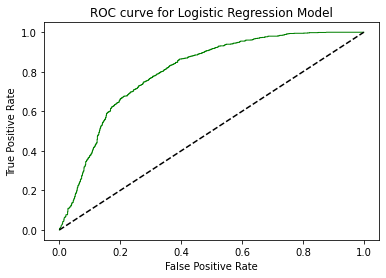

In [62]:
## Train Data

y_pred_logreg_proba = classifier_logreg.predict_proba(X_test)

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_proba[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Logistic Regression Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

y_pred_logreg_proba_train = classifier_logreg.predict_proba(X_train)

#pd.DataFrame({"fpr":fpr, "tpr":tpr, "threshold":thresholds})

Logistics Regression
Train Data
--------------------------------------------------
Accuracy: 0.6616
Mis-Classification: 0.3384
Sensitivity: 0.9612
Specificity: 0.3885
Precision: 0.3885
f_1 Score: 0.5534


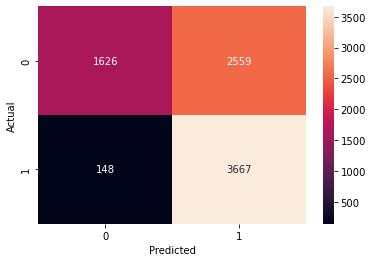

In [83]:
thresholds[np.argmax(tpr - fpr)]

pred_proba_train = y_pred_logreg_proba_train[:,1]

preds_train = np.where(pred_proba_train>0.18, 1, 0)

from sklearn.metrics import confusion_matrix,accuracy_score

plt.figure(figsize=(6,4))
cm_train = confusion_matrix(y_train, preds_train)
s = sns.heatmap(cm_train ,annot=True ,fmt='d')
s.set(xlabel='Predicted', ylabel='Actual')
print('Logistics Regression')
print('Train Data')

TP = cm_train[1][1]
TN = cm_train[0][0]
FP = cm_train[0][1]
FN = cm_train[1][0]

    # calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
print('-'*50)
print(f'Accuracy: {round(conf_accuracy,4)}') 
print(f'Mis-Classification: {round(conf_misclassification,4)}') 
print(f'Sensitivity: {round(conf_sensitivity,4)}') 
print(f'Specificity: {round(conf_specificity,4)}') 
print(f'Precision: {round(conf_precision,4)}')
print(f'f_1 Score: {round(conf_f1,4)}')

# Test Data

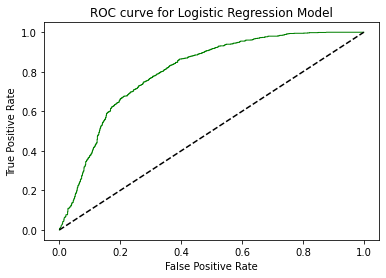

Logistics Regression
Test Data
--------------------------------------------------
Accuracy: 0.667
Mis-Classification: 0.333
Sensitivity: 0.9551
Specificity: 0.4021
Precision: 0.4021
f_1 Score: 0.566


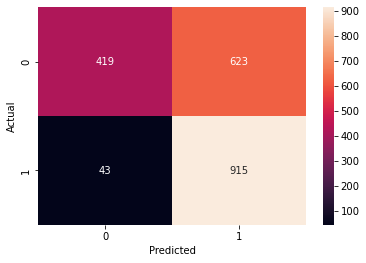

In [84]:
## Test Data

y_pred_logreg_proba = classifier_logreg.predict_proba(X_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_proba[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Logistic Regression Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()


pd.DataFrame({"fpr":fpr, "tpr":tpr, "threshold":thresholds})

thresholds[np.argmax(tpr - fpr)]

pred_proba = y_pred_logreg_proba[:,1]

preds = np.where(pred_proba>0.18, 1, 0)

from sklearn.metrics import confusion_matrix,accuracy_score

plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test, preds)
s = sns.heatmap(cm ,annot=True ,fmt='d')
s.set(xlabel='Predicted', ylabel='Actual')
print('Logistics Regression')
print('Test Data')

TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
    # calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
print('-'*50)
print(f'Accuracy: {round(conf_accuracy,4)}') 
print(f'Mis-Classification: {round(conf_misclassification,4)}') 
print(f'Sensitivity: {round(conf_sensitivity,4)}') 
print(f'Specificity: {round(conf_specificity,4)}') 
print(f'Precision: {round(conf_precision,4)}')
print(f'f_1 Score: {round(conf_f1,4)}')

# Decision Tree

In [65]:
X = df.drop(['Churned'],axis=1)
y = df['Churned']

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [67]:
classifier_dt = DecisionTreeClassifier(max_depth=8,random_state=0)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=0)

# Train Data

Decision Tree
Train Data
--------------------------------------------------
Accuracy: 0.667
Mis-Classification: 0.333
Sensitivity: 0.9551
Specificity: 0.4021
Precision: 0.4021
f_1 Score: 0.566


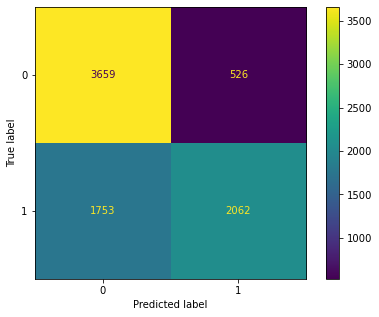

In [68]:
## Train Data
# Get probabilities of records belonging to each class
y_pred_logreg_proba_dt_train = classifier_dt.predict_proba(X_train)

y_pred_logreg_val_dt_train = classifier_dt.predict(X_train)

pred_proba_dt_train = y_pred_logreg_proba_dt_train[:,1]

preds_dt_train = np.where(pred_proba_dt_train>0.70, 1, 0)

plt.rcParams['figure.figsize']=(7,5)
cm_dt_train = confusion_matrix(y_train, preds_dt_train)
ConfusionMatrixDisplay(confusion_matrix=cm_dt_train).plot()
print('Decision Tree')
print('Train Data')

    # calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
conf_specificity = (TN / float(TN + FP))

conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
print('-'*50)
print(f'Accuracy: {round(conf_accuracy,4)}') 
print(f'Mis-Classification: {round(conf_misclassification,4)}') 
print(f'Sensitivity: {round(conf_sensitivity,4)}') 
print(f'Specificity: {round(conf_specificity,4)}') 
print(f'Precision: {round(conf_precision,4)}')
print(f'f_1 Score: {round(conf_f1,4)}')

# Test Data

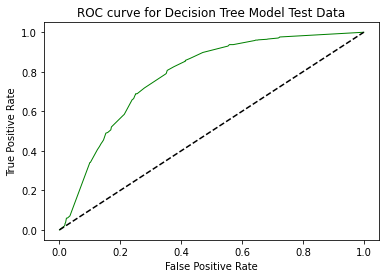

Decision Tree
Test Data
--------------------------------------------------
Accuracy: 0.67
Mis-Classification: 0.33
Sensitivity: 0.49
Specificity: 0.84
Precision: 0.84
f_1 Score: 0.62


<Figure size 288x288 with 0 Axes>

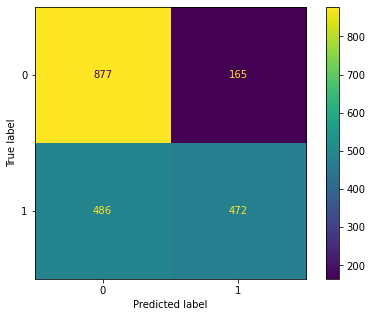

In [69]:
## Test Data

# Get probabilities of records belonging to each class
y_pred_logreg_proba_dt = classifier_dt.predict_proba(X_test)
y_pred_logreg_proba_dt

y_pred_logreg_val_dt = classifier_dt.predict(X_test)
y_pred_logreg_val_dt

pred_proba_dt = y_pred_logreg_proba_dt[:,1]

preds_dt = np.where(pred_proba_dt>0.70, 1, 0)

from sklearn.metrics import roc_curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_logreg_proba_dt[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr_dt,tpr_dt,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Decision Tree Model Test Data')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

plt.figure(figsize=(4,4))
cm_dt = confusion_matrix(y_test, preds_dt)
ConfusionMatrixDisplay(confusion_matrix=cm_dt).plot()
print('Decision Tree')
print('Test Data')

TP = cm_dt[1][1]
TN = cm_dt[0][0]
FP = cm_dt[0][1]
FN = cm_dt[1][0]

    
    # calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
print('-'*50)
print(f'Accuracy: {round(conf_accuracy,2)}') 
print(f'Mis-Classification: {round(conf_misclassification,2)}') 
print(f'Sensitivity: {round(conf_sensitivity,2)}') 
print(f'Specificity: {round(conf_specificity,2)}') 
print(f'Precision: {round(conf_precision,2)}')
print(f'f_1 Score: {round(conf_f1,2)}')


 # Visualizing the decision tree
    


# Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
classifier_rf = RandomForestClassifier(n_estimators= 20 ,max_depth=8, random_state=0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=20, random_state=0)

# Train Data

Random Forest
Train Data
--------------------------------------------------
Accuracy: 0.7089
Mis-Classification: 0.2911
Sensitivity: 0.5098
Specificity: 0.8903
Precision: 0.8903
f_1 Score: 0.6484


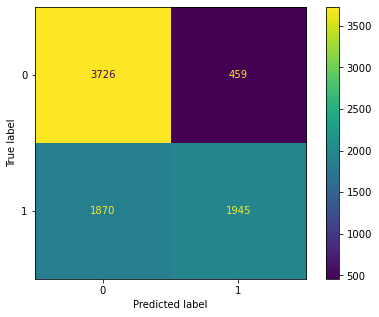

In [72]:
## Train Data

y_pred_logreg_proba_rf_train = classifier_rf.predict_proba(X_train)

pred_proba_rf_train = y_pred_logreg_proba_rf_train[:,1]

preds_rf_train = np.where(pred_proba_rf_train>0.70, 1, 0)

cm_rf_train = confusion_matrix(y_train, preds_rf_train)
ConfusionMatrixDisplay(confusion_matrix=cm_rf_train).plot()
print('Random Forest')
print('Train Data')

TP = cm_rf_train[1][1]
TN = cm_rf_train[0][0]
FP = cm_rf_train[0][1]
FN = cm_rf_train[1][0]

    
    # calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
print('-'*50)
print(f'Accuracy: {round(conf_accuracy,4)}') 
print(f'Mis-Classification: {round(conf_misclassification,4)}') 
print(f'Sensitivity: {round(conf_sensitivity,4)}') 
print(f'Specificity: {round(conf_specificity,4)}') 
print(f'Precision: {round(conf_precision,4)}')
print(f'f_1 Score: {round(conf_f1,4)}')

# Test Data

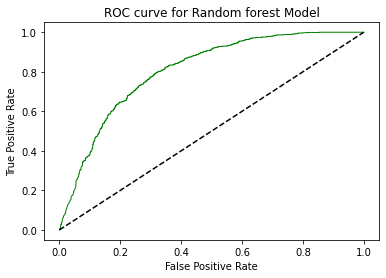

Random Forest
Test Data
--------------------------------------------------
Accuracy: 0.6835
Mis-Classification: 0.3165
Sensitivity: 0.4718
Specificity: 0.8781
Precision: 0.8781
f_1 Score: 0.6138


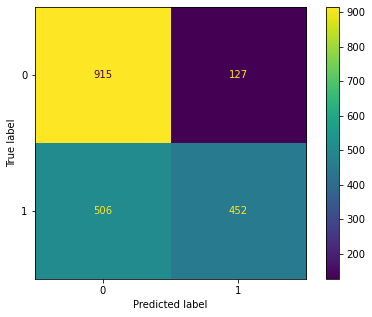

In [73]:
## Test Data

y_pred_logreg_proba_rf = classifier_rf.predict_proba(X_test)

from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_logreg_proba_rf[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr_rf,tpr_rf,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Random forest Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

pred_proba_rf = y_pred_logreg_proba_rf[:,1]

preds_rf = np.where(pred_proba_rf>0.70, 1, 0)

cm_rf = confusion_matrix(y_test, preds_rf)
ConfusionMatrixDisplay(confusion_matrix=cm_rf).plot()
print('Random Forest')
print('Test Data')

TP = cm_rf[1][1]
TN = cm_rf[0][0]
FP = cm_rf[0][1]
FN = cm_rf[1][0]

    
    # calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
print('-'*50)
print(f'Accuracy: {round(conf_accuracy,4)}') 
print(f'Mis-Classification: {round(conf_misclassification,4)}') 
print(f'Sensitivity: {round(conf_sensitivity,4)}') 
print(f'Specificity: {round(conf_specificity,4)}') 
print(f'Precision: {round(conf_precision,4)}')
print(f'f_1 Score: {round(conf_f1,4)}')

## The Logistics Regression model yields the relatively good result across Accuracy, Sensitivity, and Specificity in both train and test data. This is the best model for predicting churn with sensitivity for train and test data being 97 % and 96 % respectively. Also logistic regression has a good accuracy score of 68 % for train data and 67 % for test data. 

# Multivariate Normality

### Henze-Zirkler test 

#### H0 (accepted): The variables follow a multivariate normality

In [74]:

from pingouin import multivariate_normality
import pandas as pd
import numpy as np
data = pd.DataFrame(df)
multivariate_normality(df, alpha=.05)
# ## in output "normal= True" if X comes from a multivariate normal distribution.

HZResults(hz=829.1351187847271, pval=0.0, normal=False)

#### As normal = False, the data doesn't follow multivariate normality

# Mahalanobis distance to check for multivariate outliers

In [75]:

def mahalanobis(x=None, data=None, cov=None): 
    x_mu = x - np.mean(data)   
    if not cov:
        cov = np.cov(data.values.T) 
    inv_covmat = np.linalg.inv(cov) 
    left = np.dot(x_mu, inv_covmat) 
    mahal = np.dot(left, x_mu.T)    
    return mahal.diagonal() 

In [76]:
df_norm['mahalanobis'] = mahalanobis(x=df_norm.drop(df_norm.columns[[0,3]], axis=1), 
                 data=df_norm[['session_count','quest_completed_event_count','active_days','session_length_min']])

In [77]:
from scipy.stats import chi2

df_norm['p'] = 1 - chi2.cdf(df_norm['mahalanobis'], 3)
df_norm.head()

,Churned,session_count,quest_completed_event_count,store_purchase_event_count,active_days,session_length_min,mahalanobis,p
0,0,-0.13047,-0.22727,-0.67254,0.95994,-0.17490,8.03838,0.04523
1,0,-0.41975,-0.23823,-0.67254,-0.13604,-0.23754,0.86641,0.83353
2,1,0.75261,-0.19440,0.05946,-0.19693,0.75046,8.51696,0.03645
3,0,2.15336,2.01868,1.52346,2.29948,2.13321,5.79331,0.12211
4,1,-0.22182,-0.51212,-0.67254,0.04662,-0.35648,0.71899,0.86873


In [78]:
mul_out_churn = df_norm.loc[(df_norm['p']< 0.001) & (df_norm['Churned'] == 1),  ]
mul_out_stay = df_norm.loc[(df_norm['p']< 0.001) & (df_norm['Churned'] == 0),   ]

In [79]:
mul_out_churn.shape

(68, 8)

In [80]:
mul_out_stay.shape

(471, 8)

In [81]:
mul_out =  df_norm.loc[(df_norm['p']< 0.001), ]
mul_out.shape

(539, 8)

## Checking Nature of these 539 Multivariante Outliers

In [82]:
mul_out.groupby(['Churned']).std()

,session_count,quest_completed_event_count,store_purchase_event_count,active_days,session_length_min,mahalanobis,p
Churned,,,,,,,
0,0.91157,1.02077,1.05979,1.01248,0.88342,4.93210,0.00031
1,1.01223,1.03822,1.04077,0.68881,0.88420,6.54723,0.00031


#### There are 539 Multivariate outliers which have leverage affect, out of which 68 churned and 471 stayed. The profiling of these 68 customers on basis of Standard deviation is close to 0. Indicating they have similar profile, likely moving to a particular company or a particular rival company. These might reveal the working business to rival company hampering the growth of the company. Further analysis of these IDs is required.